### Polynomiell regression
Ett _polynom_ är en form 

$\mathbb{P}(n) = a_0 + a_1x_1 + a_2x_2^2 + \ldots + a_nx_n^n$

Polynomiell regression är ett specialfall av multipel linjär regression men i en variabel:

$y = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n + \epsilon $

Vi har alltså bara en parameter, men flera _features_ (sv. egenskap, oftast svengelska 'fit-sjur'). Varje kolumn är en potens av vår inparameter.

$$
\begin{pmatrix}
 y_1\\
 y_2\\
 \vdots\\
 y_n\\
\end{pmatrix} =
\begin{pmatrix}
 1&  x_1& x_1^2  &\dots & x_1^m \\
 1&  x_2& x_2^2 & \dots & x_2^m\\
 \vdots&\vdots  &\vdots  &\ddots & \vdots\\
 1& x_n & x_n^2 & \dots & x_n^m\\
\end{pmatrix}
\begin{pmatrix}
 \beta_0\\
 \beta_1\\
 \vdots\\
 \beta_m\\
\end{pmatrix} + 

\begin{pmatrix}
 \epsilon_0\\
 \epsilon_1\\
 \vdots\\
 \epsilon_n\\
\end{pmatrix}
$$

Vad är det som är linjärt här egentligen? Jo, det är multiplikation med ett tal (en _skalär_) som är linjär för polynom. Låt $\mathcal{L}(n)$ vara funktionen som multiplicerar ett polynom, säg $\mathbb{P}(2) = x²$, med $n$ -- dvs $\mathcal{L}(3) = 3x²$. Då gäller att
\begin{equation}
\mathcal{L}(a) + \mathcal{L}(b) = \mathcal{L}(a+b)
\end{equation}
Villket är ett tillräckligt villkor för linjäritet. Lite löst uttryckt är det koefficienterna som vi uppskattar så då är problemet vi löser linjärt. Precis som vid multipel regression är det flera linjer vi uppskattar -- en för varje koefficient som alltså är någon sorts viktning eller skalfaktor på varje komponent av polynomet. Det är operationerna på dessa koefficienter i regressionen som alltså är linjära.

(100,)

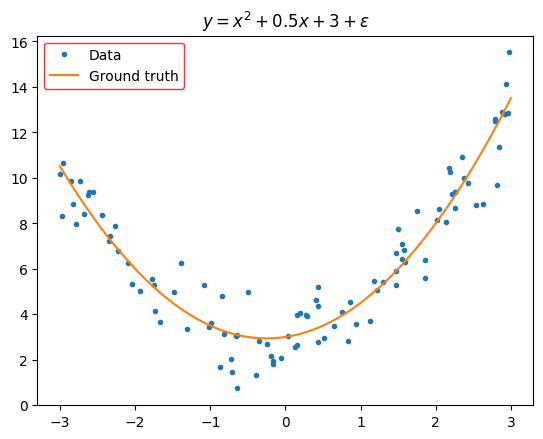

In [118]:
import numpy as np
import matplotlib.pyplot as plt

def ground_truth(x):
    return np.square(x) + .5*x + 3

samples = 100

def draw_data(X, y):
    fig, ax  = plt.figure(dpi=100), plt.axes()
    ax.plot(X, y, '.', label="Data")

    x = np.linspace(-3,3, samples)
    ax.plot(x, ground_truth(x), label="Ground truth")

    ax.set(title=r"$y=x^2 + 0.5x + 3 + \epsilon$")
    ax.legend(edgecolor="r")

    return ax

X = np.random.uniform(-3,3, (samples, 1))
y = ground_truth(X)+np.random.randn(samples, 1)

draw_data(X, y)
X.reshape(-1,).shape

array([[0.99224308],
       [0.52232078],
       [2.97979504]])

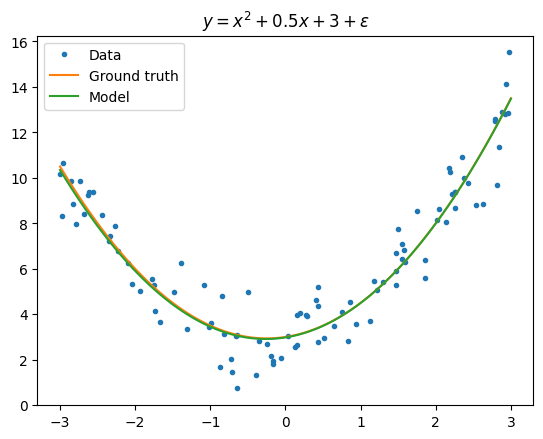

In [119]:
beta_hat = np.polyfit(X.reshape(-1,), y, deg=2)
ax = draw_data(X, y)
x = np.linspace(-3, 3, samples)

ax.plot(x, beta_hat[0]*np.square(x)+beta_hat[1]*x + beta_hat[2], label="Model")
ax.legend()
beta_hat

In [120]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X)
poly_features[:4], X[:4], np.square(X[:4])

(array([[ 2.1337474 ,  4.55287795],
        [-0.19737785,  0.03895801],
        [ 2.00984444,  4.03947467],
        [-1.93428108,  3.74144331]]),
 array([[ 2.1337474 ],
        [-0.19737785],
        [ 2.00984444],
        [-1.93428108]]),
 array([[4.55287795],
        [0.03895801],
        [4.03947467],
        [3.74144331]]))

In [121]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y)

model.coef_, model.intercept_

(array([[0.52232078, 0.99224308]]), array([2.97979504]))

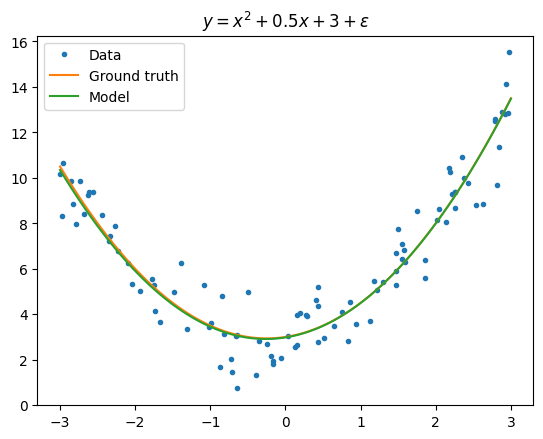

In [122]:
x = np.linspace(-3,3, samples)
x_poly_features = poly.transform(x.reshape(-1,1))
# mer generellt sätt att applicera modellen för polynom
# LinearRegression behöver inte veta vad datan representerar, vi har redan omvandlat den
pred = model.predict(x_poly_features)

ax = draw_data(X, y)
ax.plot(x, pred, label = "Model")
ax.legend()

0.10333115788144875

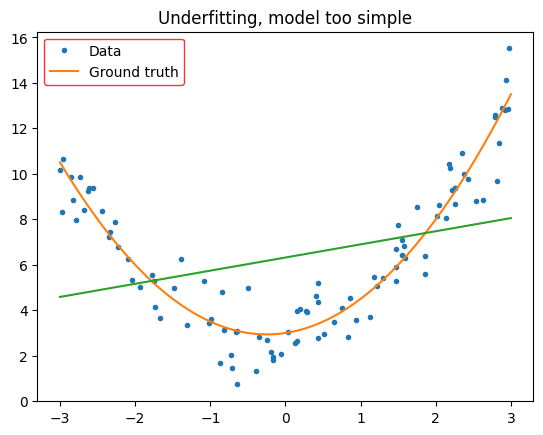

In [123]:
model = LinearRegression()
model.fit(X, y)
ax = draw_data(X, y)
ax.plot(x, model.predict(x.reshape(-1,1)))
ax.set(title="Underfitting, model too simple")
model.score(X, y)

(100, 30)


0.9226792299960848

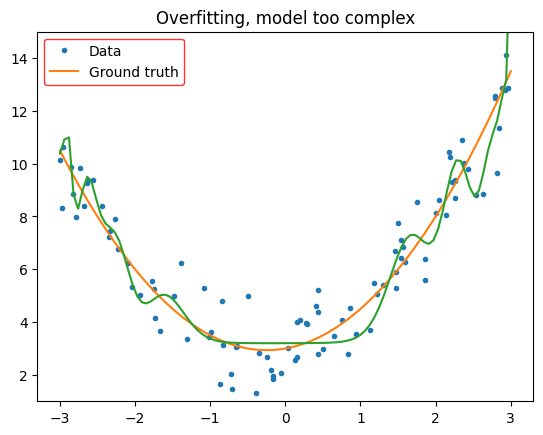

In [124]:
poly_model_30 = PolynomialFeatures(30, include_bias=False)
X_features = poly_model_30.fit_transform(X)
print(X_features.shape)

model = LinearRegression()
model.fit(X_features, y)

x = np.linspace(-3,3, samples)

x_poly_features = poly_model_30.transform(x.reshape(-1,1))
pred = model.predict(x_poly_features)

ax = draw_data(X, y)
ax.plot(x, pred)
ax.set(title="Overfitting, model too complex", ylim=[1,15])
model.score(X_features, y)

In [125]:
samples = 10000
X = np.random.uniform(-3,3, (samples, 1))
f = lambda x: x**4 + x**2 + 0.5 * x + 3
y = f(x) + np.random.randn(samples, 1)


In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((670, 1), (165, 1), (165, 1), (670, 100), (165, 100), (165, 100))

In [127]:
from sklearn.metrics import root_mean_squared_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False)
    train_features = model_poly.fit_transform(X_train)
    val_features = model_poly.transform(X_val)
    model_linear_regression = LinearRegression()

    model_linear_regression.fit(train_features, y_train)

    y_pred_val = model_linear_regression.predict(val_features)

    RMSE_val.append(root_mean_squared_error(y_val, y_pred_val))

Text(0.5, 1.0, 'RMSE on validation data for different degress of polynomials')

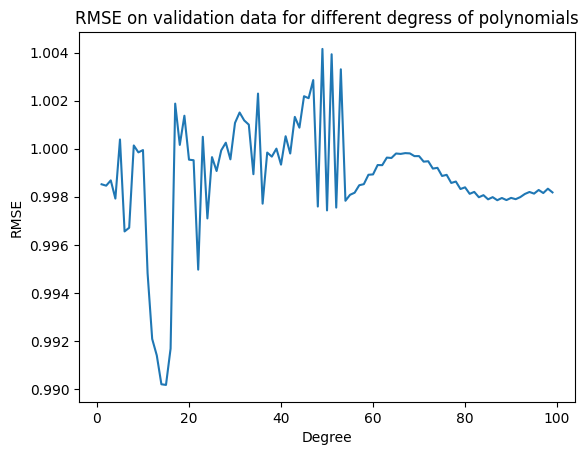

In [128]:
plt.plot(range(1,100), RMSE_val)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degress of polynomials")

Text(0.5, 1.0, 'RMSE on validation data for different degress of polynomials')

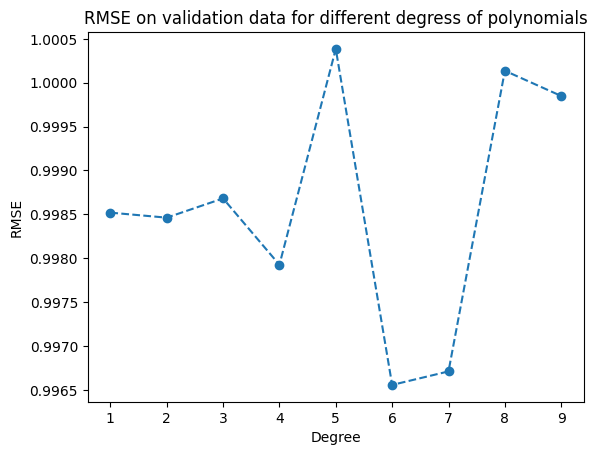

In [129]:
plt.plot(range(1,10), RMSE_val[:9], 'o--')
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("RMSE on validation data for different degress of polynomials")
